In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18 as cosmo

In [50]:
lss_data = np.loadtxt('../data/SDSS/dr72_bright_34_lss/lss.dr72bright34.dat')
photo_data = np.loadtxt('../data/SDSS/dr72_bright_34_lss/photoinfo.dr72bright34.dat')

In [51]:
c = 299792.458
z_obs = lss_data[:,5]/c
ra = lss_data[:,3]
dec = lss_data[:,4]
m_u = photo_data[:,1]
m_g = photo_data[:,2]
m_r = photo_data[:,3]
m_z = photo_data[:,4]

(array([4.98880e+04, 1.42526e+05, 1.59750e+05, 1.18035e+05, 5.81830e+04,
        2.22260e+04, 6.67200e+03, 1.46900e+03, 2.52000e+02, 2.70000e+01]),
 array([0.00116651, 0.03869344, 0.07622038, 0.11374731, 0.15127425,
        0.18880118, 0.22632812, 0.26385505, 0.30138198, 0.33890892,
        0.37643585]),
 <BarContainer object of 10 artists>)

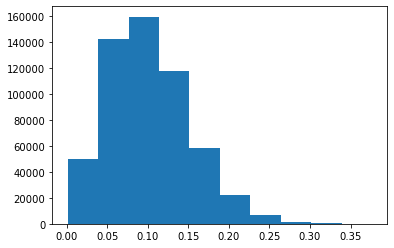

In [52]:
plt.hist(z)

(110.0, 250.0)

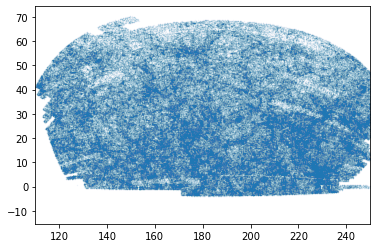

In [53]:
plt.scatter(ra, dec, s=0.1, alpha=0.1)
plt.xlim([110,250])

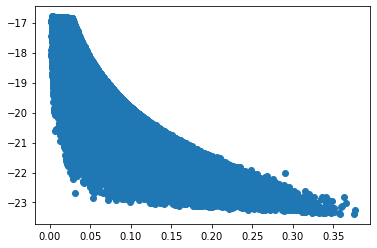

In [54]:
plt.scatter(z, m_r)

In [55]:
ii = (z<=0.114) & (m_r<=-20.0)
ii_radec = (dec>0) & (dec<50) & (ra>130) & (ra<230)

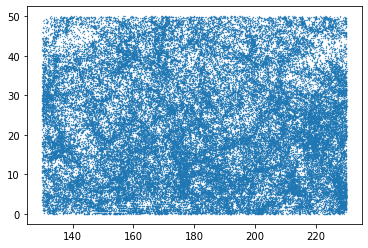

In [56]:
plt.scatter(ra[ii&ii_radec], dec[ii&ii_radec], s=0.1)
#plt.xlim([180,220])
#plt.ylim([0,30])

In [57]:
print(np.count_nonzero(ii&ii_radec))

90655


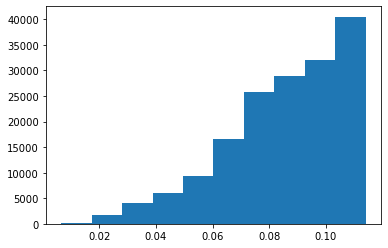

In [58]:
_ = plt.hist(z[ii])

In [59]:
phi   = np.deg2rad(360 - ra[ii&ii_radec])
theta = np.deg2rad(90 - dec[ii&ii_radec])
r = np.array(cosmo.comoving_distance(z_obs[ii&ii_radec]))

In [60]:
x = r * np.cos(phi) * np.sin(theta)
y = r * np.sin(phi) * np.sin(theta)
z = r * np.cos(theta)

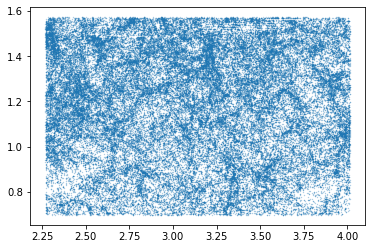

In [61]:
plt.scatter(phi, theta, s=0.1, alpha=0.5)

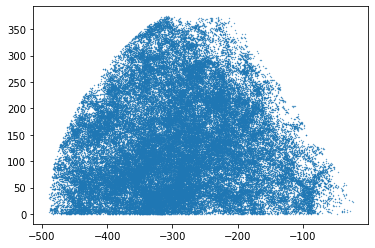

In [62]:
plt.scatter(x,z, s=0.1)

In [63]:
min_phi = np.min(phi)
max_phi = np.max(phi)
min_costheta = np.min(np.cos(theta))
max_costheta = np.max(np.cos(theta))
n = len(phi)
random_phi = np.random.random(n)*(max_phi - min_phi) + min_phi
random_theta = np.arccos(np.random.random(n)*(max_costheta - min_costheta) + min_costheta)
random_r = r.copy()
np.random.shuffle(random_r)
random_r = (np.random.random(n)**(1.0/3.0)) * np.max(r) 

random_x = random_r * np.cos(random_phi) * np.sin(random_theta)
random_y = random_r * np.sin(random_phi) * np.sin(random_theta)
random_z = random_r * np.cos(random_theta)

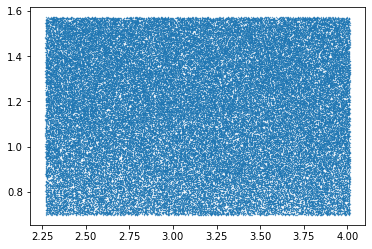

In [64]:
plt.scatter(random_phi, random_theta, s=0.1)

(array([9093., 9207., 8999., 8957., 9003., 9081., 8930., 9115., 9084.,
        9186.]),
 array([2.26898873, 2.44351391, 2.61803909, 2.79256426, 2.96708944,
        3.14161462, 3.3161398 , 3.49066497, 3.66519015, 3.83971533,
        4.01424051]),
 <BarContainer object of 10 artists>)

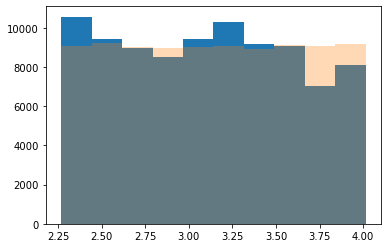

In [65]:
plt.hist(phi)
plt.hist(random_phi, alpha=0.3)

(array([ 7146.,  7529.,  8377.,  8791.,  9089.,  9623.,  9789., 10150.,
        10035., 10126.]),
 array([0.69815743, 0.78541986, 0.87268228, 0.9599447 , 1.04720713,
        1.13446955, 1.22173198, 1.3089944 , 1.39625683, 1.48351925,
        1.57078168]),
 <BarContainer object of 10 artists>)

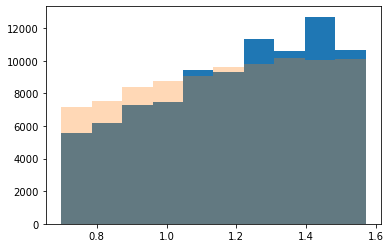

In [66]:
plt.hist(theta)
plt.hist(random_theta, alpha=0.3)

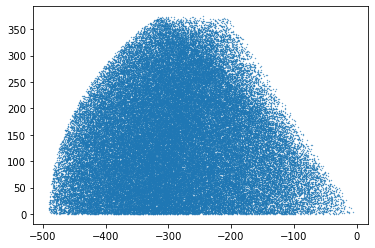

In [67]:
plt.scatter(random_x, random_z, s=0.1)

(array([  156.,   720.,  1865.,  3596.,  5694.,  8297., 11450., 15050.,
        19450., 24377.]),
 array([  9.7387352 ,  57.90630133, 106.07386747, 154.2414336 ,
        202.40899973, 250.57656587, 298.744132  , 346.91169814,
        395.07926427, 443.2468304 , 491.41439654]),
 <BarContainer object of 10 artists>)

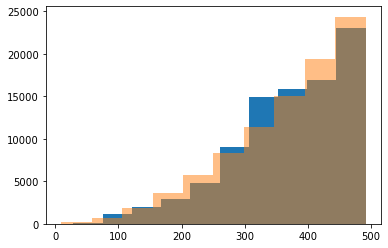

In [68]:
plt.hist(r)
plt.hist(random_r, alpha=0.5)

In [70]:
data  = np.array([x,y,z])
random = np.array([random_x, random_y, random_z])
data_radecz = np.array([ra[ii&ii_radec],dec[ii&ii_radec],z_obs[ii&ii_radec]])

In [71]:
np.savetxt("../data/SDSS/dr72_bright_34_lss/SDSS_xyz_data.dat", data.T)
np.savetxt("../data/SDSS/dr72_bright_34_lss/SDSS_radecz_data.dat", data.T)
np.savetxt("../data/SDSS/dr72_bright_34_lss/random_SDSS_xyz_data.dat", random.T)